In [7]:
import keras
from keras.models import Model
from keras.layers import Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Import reqiured librarys

In [23]:
trdata = ImageDataGenerator(validation_split=0.2)
traindata = trdata.flow_from_directory(directory=r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\archive\PlantVillage",target_size=(224,224),subset="training")
testdata = trdata.flow_from_directory(directory=r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\archive\PlantVillage", target_size=(224,224),subset = "validation")

Found 16515 images belonging to 15 classes.
Found 4122 images belonging to 15 classes.


Use the ImageDataGenerator to retrive and preprocess my data.
data will be fetched from file location and labels automatically applied. 
validation_split allows me to automatically split my data into a train and test sample.

In [26]:

traindata.class_indices

{'Pepper__bell___Bacterial_spot': 0,
 'Pepper__bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato_Bacterial_spot': 5,
 'Tomato_Early_blight': 6,
 'Tomato_Late_blight': 7,
 'Tomato_Leaf_Mold': 8,
 'Tomato_Septoria_leaf_spot': 9,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 10,
 'Tomato__Target_Spot': 11,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 12,
 'Tomato__Tomato_mosaic_virus': 13,
 'Tomato_healthy': 14}

Output labels of our data, 15 possible classes. 

In [27]:
from keras.applications.vgg16 import VGG16
vggmodel = VGG16(weights='imagenet', include_top=True)

Download the VGG architecture
set the VGG16 architecture weights to be that of the VGG16 architecture trained More than 14 million images, 
so that we can use transfer learning and not have to directly train these layers

In [28]:
vggmodel.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Summary shows VGG16 convolutional nural network layout.
currently has 1000 possible ouputs as specified by the image net dataset. 

In [29]:
for layers in (vggmodel.layers)[:19]:
    print(layers)
    layers.trainable = False

Make the first 19 layers un-trainable, so that the weights of hese layers do not change during training

In [30]:
X= vggmodel.layers[-2].output
predictions = Dense(15, activation="softmax")(X)
model_final = Model(vggmodel.input,predictions)

Create the dense layer with 15 outputs, to repreasen our 15 classes of healhy/diseseased plants

IS FIRST LINE REMOVING LAST TWO LAYERS THEN REPLACING WITH THE PREDICTIONS LAYER???????

In [31]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(learning_rate=0.0001, momentum=0.9), metrics=["accuracy"])

compile our model with a learning rate of 0.0001.
use momentum to "momentum is known to speed up learning and to help not getting stuck in local minima." -https://datascience.stackexchange.com/questions/84167/what-is-momentum-in-neural-network

In [32]:
model_final.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [33]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=40, verbose=1, mode='auto')
model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 50, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])
model_final.save_weights("vgg16_1.h5")

C:\Users\Jordan Lankford\AppData\Local\Temp\ipykernel_24980\355917588.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_final.fit_generator(generator= traindata, steps_per_epoch= 2, epochs= 50, validation_data= testdata, validation_steps=1, callbacks=[checkpoint,early])


Epoch 1/50
2/2 [==============================] - 27s 16s/step - loss: 3.7573 - accuracy: 0.0781 - val_loss: 3.3971 - val_accuracy: 0.0312
Epoch 2/50
2/2 [==============================] - 22s 14s/step - loss: 3.2589 - accuracy: 0.1250 - val_loss: 2.5187 - val_accuracy: 0.2188
Epoch 3/50
2/2 [==============================] - 22s 15s/step - loss: 2.9395 - accuracy: 0.2344 - val_loss: 2.6613 - val_accuracy: 0.2500
Epoch 4/50
2/2 [==============================] - 22s 15s/step - loss: 2.5910 - accuracy: 0.3125 - val_loss: 2.5742 - val_accuracy: 0.3438
Epoch 5/50
2/2 [==============================] - 22s 14s/step - loss: 2.0464 - accuracy: 0.4688 - val_loss: 2.4985 - val_accuracy: 0.1562
Epoch 6/50
2/2 [==============================] - 23s 15s/step - loss: 2.1649 - accuracy: 0.4062 - val_loss: 1.7742 - val_accuracy: 0.4062
Epoch 7/50
2/2 [==============================] - 17s 9s/step - loss: 2.0537 - accuracy: 0.4286 - val_loss: 2.1183 - val_accuracy: 0.4062
Epoch 8/50
2/2 [============

1/1 [==============================] - 1s 852ms/step
label: {'Pepper__bell___Bacterial_spot'}


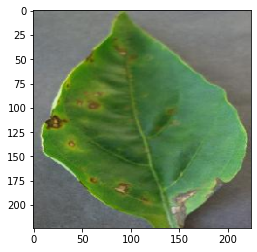

In [57]:
from keras.preprocessing import image
img = keras.utils.load_img(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich\AI\cw\just_peppers\predict\not2.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/my_model_usingsave.h5")
output = saved_model.predict(img)

result = np.where(output == np.amax(output))
#print('max probabilliy:', result[1])
#print('found at index :', result[0])
value = {i for i in traindata.class_indices if traindata.class_indices[i]==result[0]}
print("label:",value)

Function to show label assigend to one given input. 

In [34]:
model_final.save("my_model_usingsave.h5")

Predicions - CM

In [59]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [63]:
#Confution Matrix and Classification Report
saved_model = load_model(r"C:\Users\Jordan Lankford\OneDrive - University of Greenwich/AI/cw/my_model_usingsave.h5")
Y_pred = saved_model.predict(testdata)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testdata.classes, y_pred))
print('Classification Report')
target_names = ['Cats', 'Dogs', 'Horse']
print(classification_report(testdata.classes, y_pred, target_names=target_names))

129/129 [==============================] - 691s 5s/step
Confusion Matrix
[[ 8 14 10 10  5 27  9 11  4 21 16 15 28  3 18]
 [17 21 18 13  0 29 22 16 11 32 31 21 46  3 15]
 [13 16 15  7  0 24 13  8  7 27 21 16 21  2 10]
 [11 18 10  9  1 18  7 14 12 23 18 12 30  4 13]
 [ 2  2  1  1  0  2  3  3  3  2  2  1  6  0  2]
 [20 36 19 18  4 39 28 29 20 56 39 27 61  6 23]
 [13 19  8 12  4 30 10 16  6 21 18 13 24  0  6]
 [19 28 20 20  4 39 27 24 14 37 39 11 59  7 33]
 [ 8 16  6  9  2 22  9 10  8 21 20  9 29  2 19]
 [16 19 21 12  2 42 19 21 13 34 40 26 60  4 25]
 [ 9 24 14 21  0 35 27 17  8 52 37 21 46  3 21]
 [10 24 22  8  0 28 13 20 14 30 28 17 44  2 20]
 [30 45 27 22  9 77 35 34 20 72 72 40 97 10 51]
 [ 6  9  3  3  0  4  5  7  2  5 12  5  7  3  3]
 [21 23 13 17  3 32 14 22  8 30 39 19 51  4 22]]
Classification Report


NameError: name 'classification_report' is not defined

ValueError: The number of FixedLocator locations (15), usually from a call to set_ticks, does not match the number of ticklabels (4122).

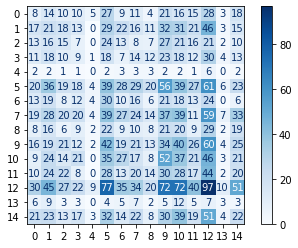

In [68]:
cm = confusion_matrix(testdata.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=testdata.classes)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np